In [ ]:
 # from google.colab import files
 # uploaded = files.upload()


In [ ]:
# Data already downloaded - using local file
# !gdown --id 13atAjRD7sIt0pv2Y__ytYvVWCKo4RPn_
# !unzip archive.zip

import pandas as pd

squirrel_data = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
squirrel_data.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13atAjRD7sIt0pv2Y__ytYvVWCKo4RPn_
To: /content/archive.zip
100% 152k/152k [00:00<00:00, 102MB/s]
Archive:  archive.zip
replace 2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,index,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
df.head()

,index,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


In [ ]:
# PRE-PROCESSING: take out columns that seem in-significant
df = df.drop(columns = ['Unique Squirrel ID', 'Hectare', 'Date', 'Hectare Squirrel Number', 'Highlight Fur Color', 'Combination of Primary and Highlight Color', 'Color notes', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions', 'Lat/Long', 'Zip Codes', 'Community Districts', 'Borough Boundaries', 'City Council Districts', 'Police Precincts'])


In [ ]:
# PRE-PROCESSING: quantifying energy expenditure for our target column

 # Map out the energy consumption using this formula:
  # Chasing = 6 --> because it requires rapid movement with a predator/pray
  # Running = 5 --> requires rapid movement
  # Climbing = 3 --> because it requires strength
  # Foraging = 2 --> searching for food, which is not as energy intensive as above
  # Eating = 1 --> least energy expenditure

#defining our columns we want to use in our formula
# columns = ['Eating', 'Foraging', 'Climbing', 'Running', 'Chasing']
# metrics = {
#     'Eating': 1,
#     'Foraging': 2,
#     'Climbing': 3,
#     'Running': 5,
#     'Chasing': 6
# }


# For the "Other Activities" category, IF all of the columns for regular categories are labeled as FALSE, we based it off of certain standards (more specific details in report)
count = 0
df['Energy_expenditure'] = 0
df.head()

for index, row in df.iterrows():
  sum=0
  if (row['Running'] == False and row['Chasing'] == False and row['Climbing'] == False and row['Foraging'] == False and row['Eating'] == False and not pd.isna(row['Other Activities']) and not row['Other Activities'] == "unknown"):

    #chasing related activity = predator/prey movement
    if ('wrestling' in str(row['Other Activities']) or 'playing' in str(row['Other Activities']) or 'chased' in str(row['Other Activities'])):
      sum+=6
    #running related activity = extreme movement
    if ('crossing' in str(row['Other Activities']) or 'jumping' in str(row['Other Activities']) or 'runs' in str(row['Other Activities']) or 'jumped' in str(row['Other Activities']) or 'leaping' in str(row['Other Activities']) or 'hopping' in str(row['Other Activities'])):
      sum+=5
    #moving relating activity = slow movement
    if ('slowly' in str(row['Other Activities']) or 'moseying' in str(row['Other Activities']) or 'scampering' in str(row['Other Activities']) or 'traveling' in str(row['Other Activities']) or 'wandering' in str(row['Other Activities']) or 'walk' in str(row['Other Activities']) or 'walked' in str(row['Other Activities']) or 'walking' in str(row['Other Activities'])):
      sum+=4
     #climbing related activity = involves altitude
    if ('falling' in str(row['Other Activities'])):
      sum+=3
    #foraging related activity = involves ground/food
    if ('hiding' in str(row['Other Activities']) or 'gathering' in str(row['Other Activities']) or 'digging' in str(row['Other Activities']) or 'planting' in str(row['Other Activities']) or 'burying' in str(row['Other Activities'])):
      sum+=2
    #eating related activity = eating or carrying food
    if ('carrying' in str(row['Other Activities']) or 'mouth' in str(row['Other Activities'])):
      sum+=1
    #no movement activities: sitting, standing, watching, stood, communicating, sleeping, dead, staring, laying, looking, hunkered, peeking, chillin’, curious, crying, hanging out, cleaning, still, patting, lying, relaxing, teasing
      #no need for if statement as these are all =0 on energy expenditure, so it will not change the energy expenditure value
    print(row['Other Activities'], sum)
  else:
    #creates target column and implement formula
    # df['Energy_expenditure'] = sum(df[col].fillna(False).astype(bool) * metrics[col] for col in columns)
    if (row['Eating'] == True):
        sum+=1
    if (row['Foraging'] == True):
        sum+=2
    if (row['Climbing'] == True):
      sum+=3
    if (row['Running'] == True):
      sum+=5
    if (row['Chasing'] == True):
      sum+=6
  if sum>10:
    df.at[index, 'Energy_expenditure'] = 10
  else:
    df.at[index, 'Energy_expenditure'] = sum

df.head(50)

wrestling with mother 6
moving slowly 4
sitting 0
playing with #5 6
hiding nut 2
gathering acorns 2
sitting 0
walking on branch 4
walking w/ something in mouth 5
dead (something ran over it) 0
grooming 0
sitting in tree 0
not sure walk-pause-walk 4
hiding in log 2
sitting still,tail over back 0
moseying 4
sitting 0
chased by dog 6
hiding 2
being chased 6
sitting 0
crossing east drive 5
standing 0
watching me 0
walking 4
playing 6
stood on fence 0
jumping 5
sitting and watching on a tree 0
being chased by #2 6
communicating from tree 0
standing 0
runs from 5
not moving 0
nut in mouth 1
sleeping 0
stood still & watched me then jumped on a fence and ran away 5
in hollow 0
jumped off 5
carrying nut away 1
sitting & watching 0
digging & burying 2
sitting 0
staring 0
playing 6
playing with #6 6
staring 0
scampering thru the grass! 4
digging 2
traveling 4
sitting 0
hiding 2
planting nut 2
playing 6
sitting there 0
laying on tree branch 0
looking at me & #5 0
sitting 0
walked between trees 4
h

,index,X,Y,Shift,Age,Primary Fur Color,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Energy_expenditure
0,0,-73.956134,40.794082,PM,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,0
1,1,-73.957044,40.794851,PM,Adult,Gray,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,5
2,2,-73.976831,40.766718,AM,Adult,Cinnamon,Above Ground,4,NaN,False,False,True,False,False,NaN,3
3,3,-73.975725,40.769703,PM,Juvenile,Gray,Above Ground,3,NaN,False,False,True,False,False,NaN,3
4,4,-73.959313,40.797533,AM,NaN,NaN,Above Ground,NaN,NaN,False,False,False,False,False,unknown,0
5,5,-73.956570,40.790256,AM,Juvenile,Gray,Ground Plane,FALSE,NaN,False,False,False,False,False,wrestling with mother,6
6,6,-73.971974,40.769305,PM,Adult,Gray,Ground Plane,FALSE,NaN,True,True,False,False,False,NaN,10
7,7,-73.960261,40.794288,PM,NaN,Gray,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,2
8,8,-73.977072,40.772975,AM,Adult,Gray,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,2
9,9,-73.959641,40.790313,PM,Adult,Gray,NaN,NaN,NaN,False,False,False,True,True,NaN,3


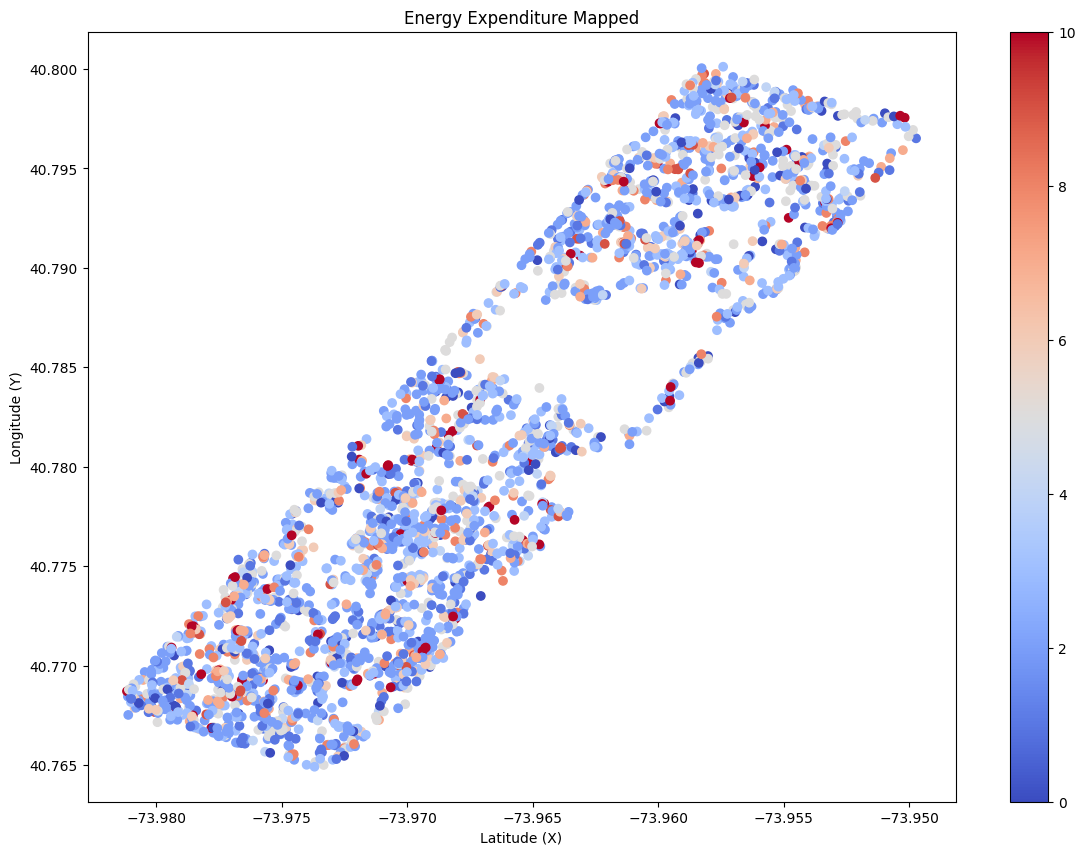

In [ ]:
#ENERGY EXPENDITURE VISUALIZATION
plt.figure(figsize=(14,10))
plt.scatter(df['X'], df['Y'], c=df['Energy_expenditure'], cmap = 'coolwarm')
plt.colorbar()
plt.title('Energy Expenditure Mapped')
plt.xlabel('Latitude (X)')
plt.ylabel('Longitude (Y)')
plt.show()

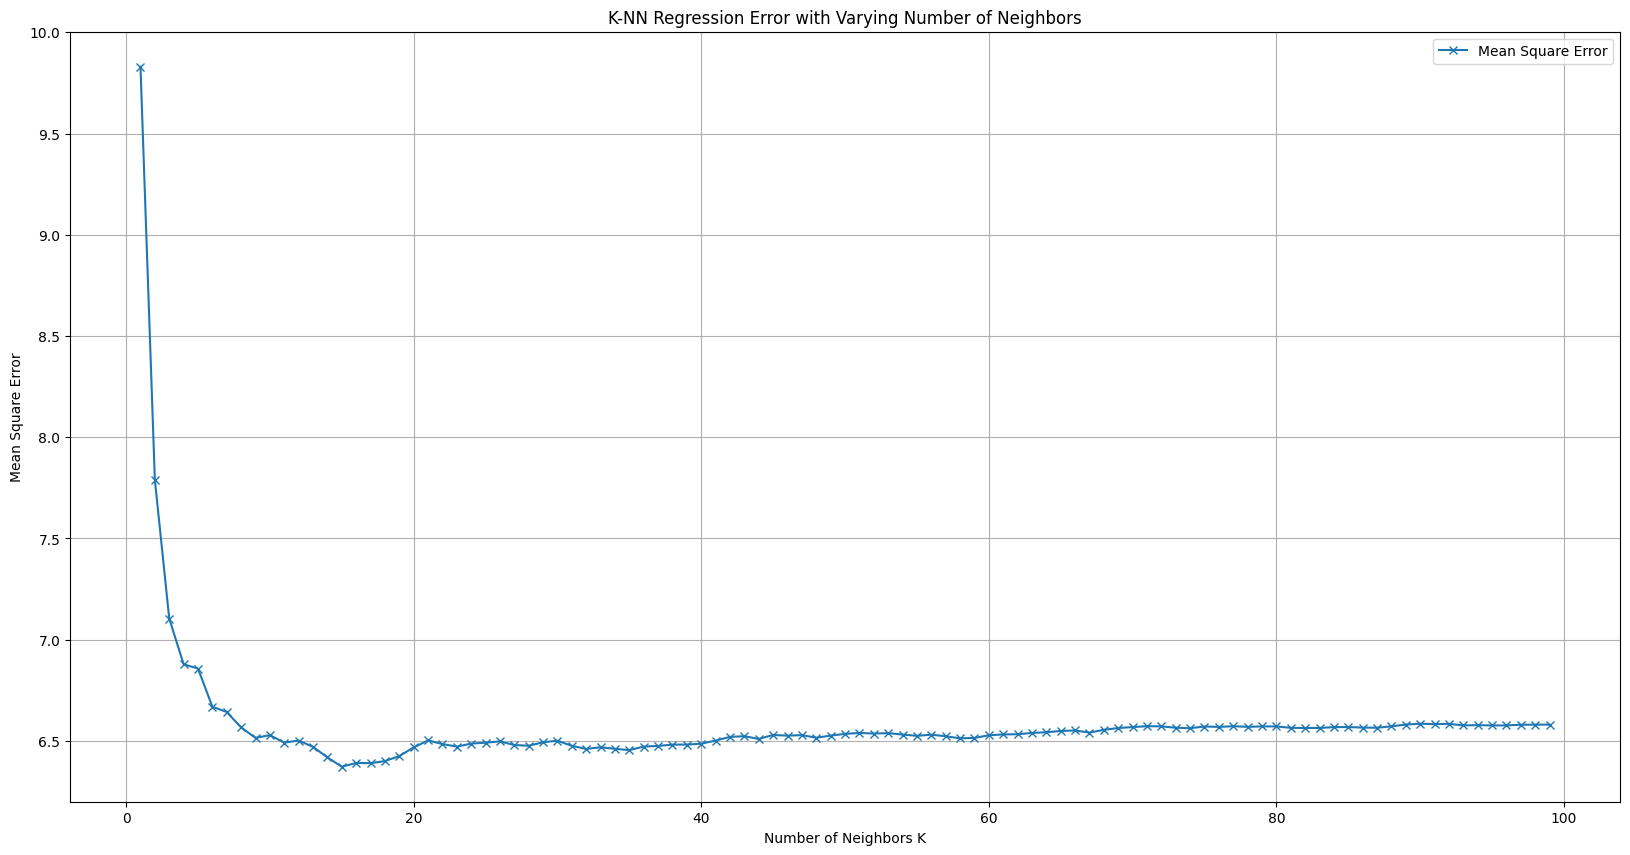

In [ ]:
#MODEL IMPLEMENTATION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x1 = df['X'] #latitude
new_min = 0
new_max = 1
# df['normalized_X'] = (df['X'] - df['X'].min()) / (df['X'].max() - df['X'].min()) * (new_max - new_min) + new_min
# x1 = df['normalized_X']
x1 = df['X']

# df['normalized_y'] = (df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min()) * (new_max - new_min) + new_min
# x2 = df['normalized_y'] #longitude
x2 = df['Y']
classes = df['Energy_expenditure']

data = list(zip(x1, x2)) #create tuples

X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.3, random_state=1) #split the data between test and train

test_error = []

#3023 instances
k_range = range(1, 100)

for k in k_range:

    #train model with k value
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    #do predictions
    y_pred = knn.predict(X_test)

    #get accuracy for each k and append to accuracy score array
    # test_accuracy.append(accuracy_score(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    test_error.append(mse)


# Plotting the results
plt.figure(figsize=(20, 10))
plt.plot(k_range, test_error, label='Mean Square Error', marker='x')
plt.title('K-NN Regression Error with Varying Number of Neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Square Error')
plt.legend()
plt.grid(True)
plt.show()

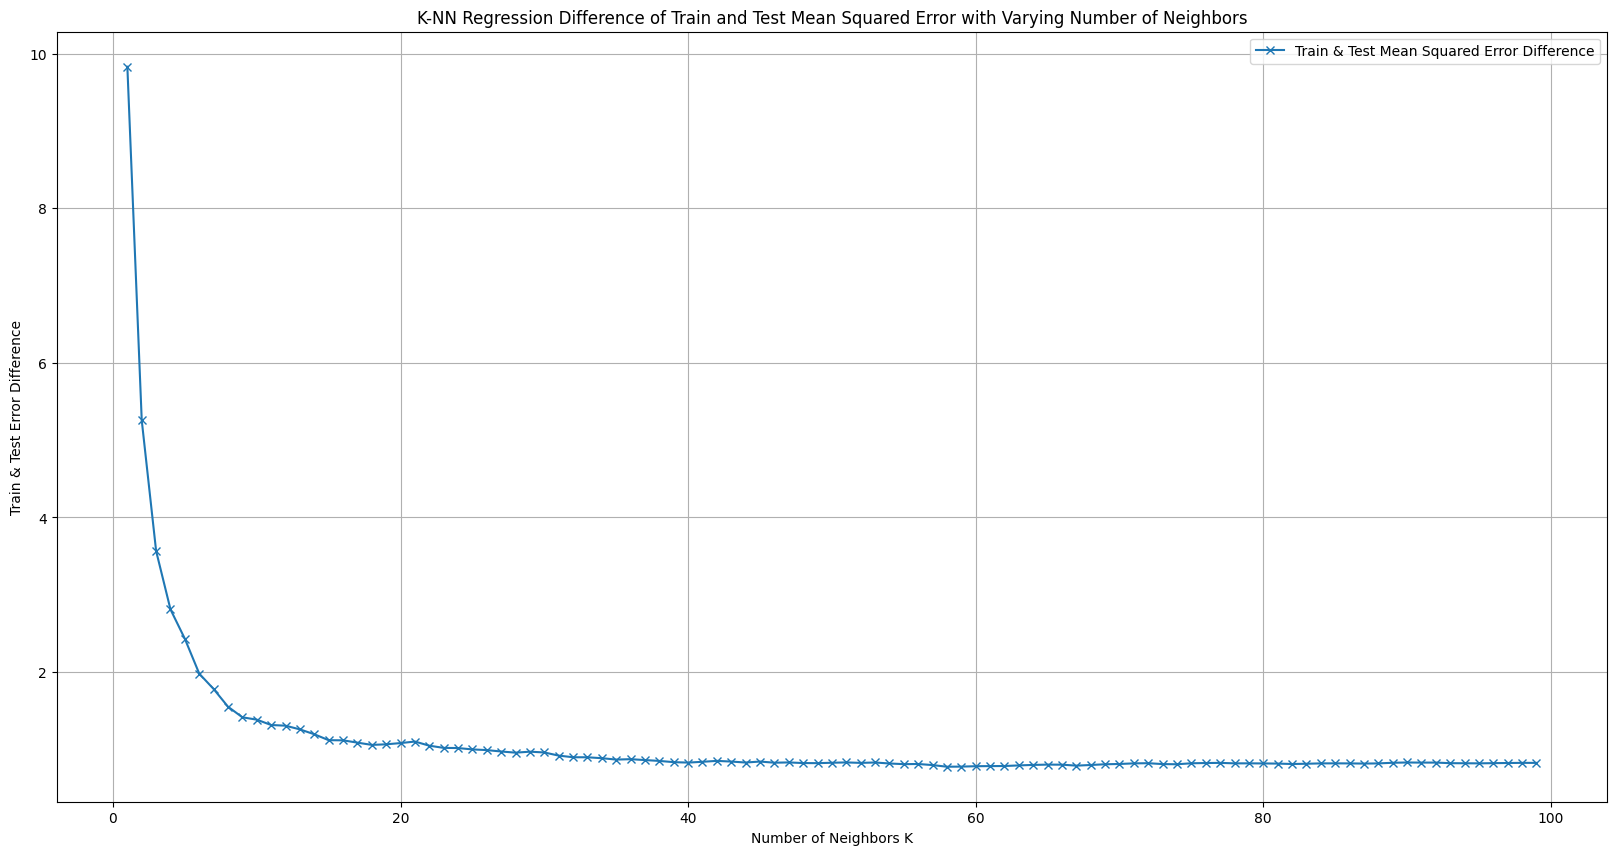

In [ ]:

#check for overfitting by comparing the y_pred_train and y_pred_test per k
traintest_diff = []
k_range = range(1, 100)
for k in k_range:

    #train model with k value
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    #do predictions
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    #get accuracy for each k and append to accuracy score array
    #test_accuracy.append(accuracy_score(y_test, y_pred))

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    traintest_diff.append(test_mse - train_mse)

#plotting the results
plt.figure(figsize=(20, 10))
plt.plot(k_range, traintest_diff, label='Train & Test Mean Squared Error Difference', marker='x')
plt.title('K-NN Regression Difference of Train and Test Mean Squared Error with Varying Number of Neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train & Test Error Difference')
plt.legend()
plt.grid(True)
plt.show()

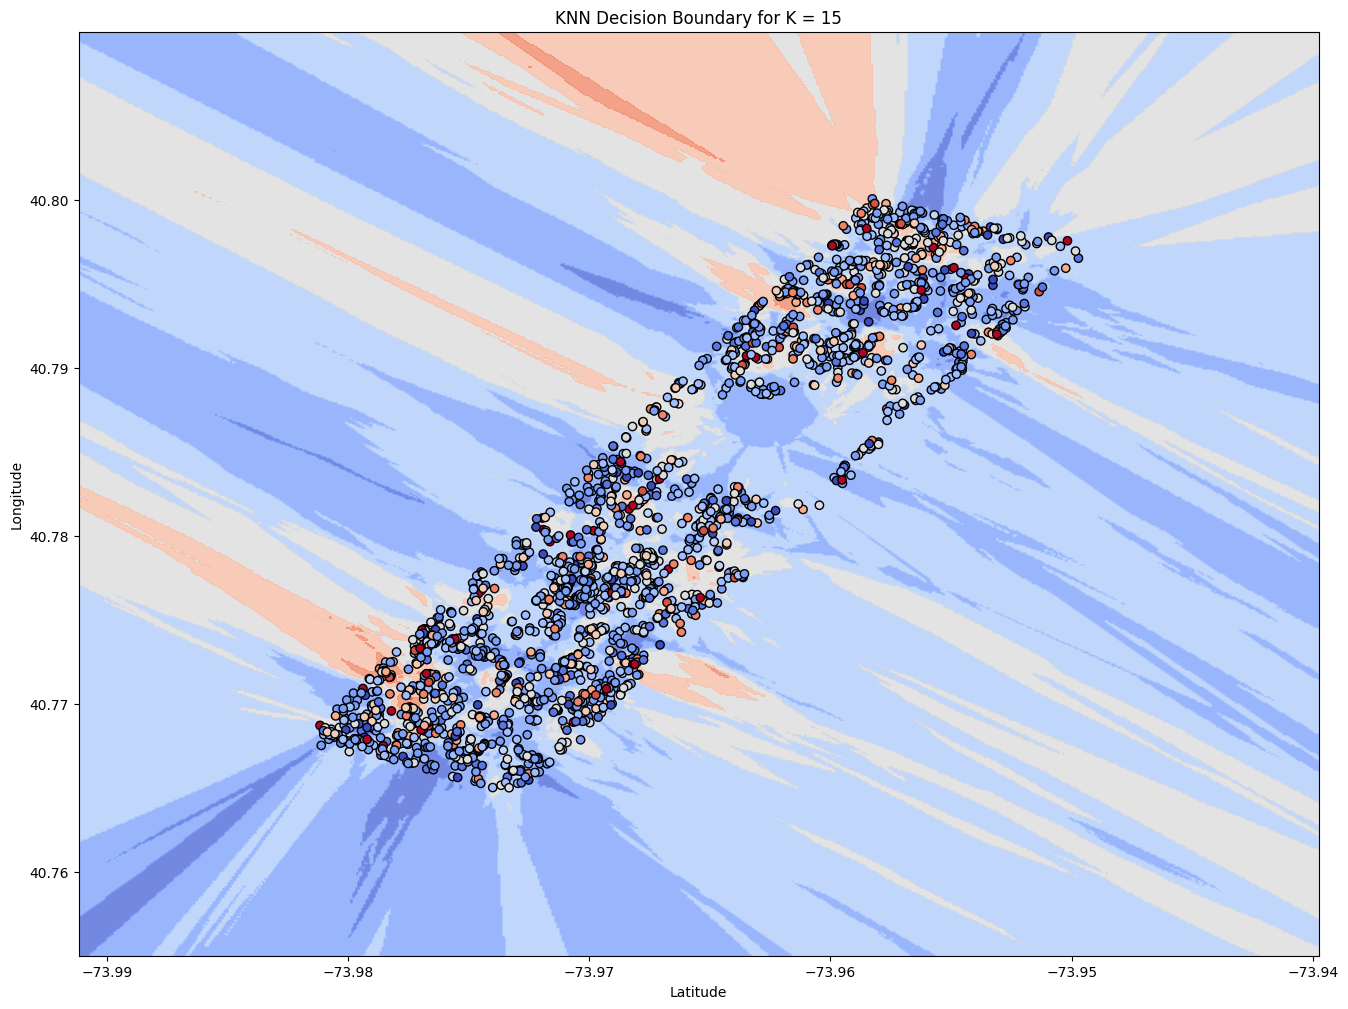

Training MSE: 5.2531905061961774
Test MSE: 6.372162195271346


In [ ]:
#k=15 seems to be giving the best error with least difference between train and test, so we will do our model with k=15
#the higher k values are plateauing in terms of accuracy score

#train model with k=15 value
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

#do predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

#create visual of our KNN model with k=31
  #NOT DONE
X_train = np.array(X_train)
X_test = np.array(X_test)
x_min, x_max = X_train[:, 0].min() - 0.01, X_train[:, 0].max() + 0.01
y_min, y_max = X_train[:, 1].min() - 0.01, X_train[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.0001),
                     np.arange(y_min, y_max, 0.0001))

#predictions for each point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 12))
#plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary for K = 15")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

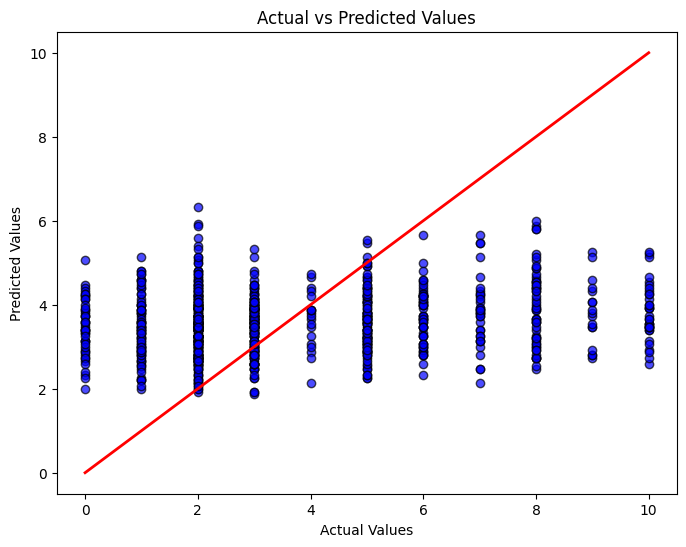

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
# this method didn't work well in evaluating our model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

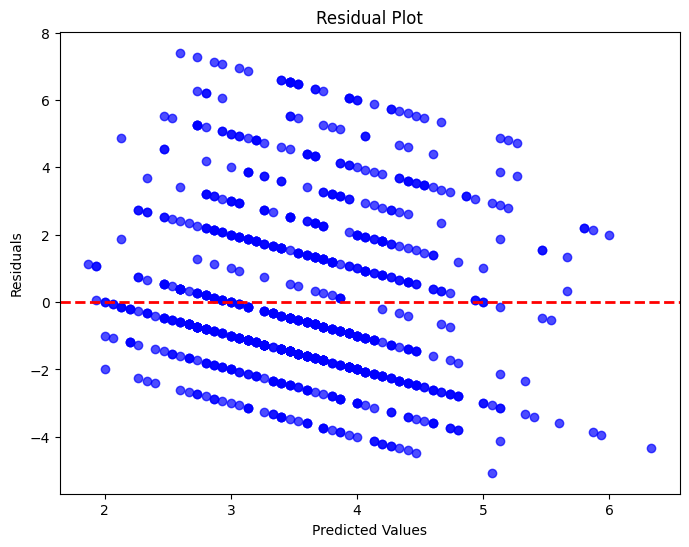

In [ ]:
residuals = y_test - y_pred_test

# Residual Plotting
# this method also didn't work well in evaluating our model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()